In [161]:
#Importing Libraries

import pandas as pd
import numpy as np
import tweepy
import requests
from timeit import default_timer as timer
import configparser
import json
import re
import matplotlib.pyplot as plt

# Gathering Data

## Gathering from WeRateDogs Twitter archive

In [2]:
Twitter_Archive_dataset = pd.read_csv('twitter-archive-enhanced.csv')

## Gathering using Twitter APi

In [139]:
#read configs
config = configparser.ConfigParser()
config.read('config.ini')
api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
assess_token = config['twitter']['assess_token']
access_token_secret = config['twitter']['access_token_secret']


In [3]:
#getting the archive tweets ids
Tweet_ids = Twitter_Archive_dataset['tweet_id']

In [ ]:
#authentication
auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(assess_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit =True)

#getting Json data for the different tweet ID
count = 0
failed_id = {}
start = timer()
with open('tweet_json.txt','w') as file:
    for item in Tweet_ids:
        count += 1
        print(f"{count}: {str(item)}")
        try:
            tweet = api.get_status(item,tweet_mode= 'extended')
            print('passed')
            json.dump(tweet._json,file)
            file.write('\n')
        except tweepy.TweepyException as e:
            print('fails')
            failed_id[item] = e
            pass
end = timer()
print(end - start)



In [11]:
print(len(failed_id))

31


In [162]:
tweet_list = []
with open('tweet_json.txt') as file:
    for item in file:
        tweet_list.append(json.loads(item))

In [163]:
tweet_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [164]:
tweet_api_dataset= pd.DataFrame(tweet_list,columns=['id','favorite_count','retweet_count'])
#Rename id to tweet_d
tweet_api_dataset = tweet_api_dataset.rename(columns = {'id':'tweet_id'})

In [165]:
#Saving tweet_api
tweet_api_dataset.to_csv('tweet_api_dataset.csv')

In [166]:
tweet_api_dataset.head()


,tweet_id,favorite_count,retweet_count
0,892420643555336193,32880,6875
1,892177421306343426,28411,5178
2,891815181378084864,21359,3421
3,891689557279858688,35820,7077
4,891327558926688256,34299,7595


## Gathering  tweet image predictions from Udacity server

In [167]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
print(response.status_code)
with open ('image_predictions.tsv', "wb") as file:
    file.write(response.content)


200


In [168]:
image_twitter_dataset = pd.read_csv('image_predictions.tsv',sep = '\t')

# Assesing the datasets for data quality and tidyness

## Assesing twitter_Archive

In [169]:
Twitter_Archive_dataset

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [170]:
Twitter_Archive_dataset.shape

(2356, 17)

In [171]:
Twitter_Archive_dataset.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [172]:

Twitter_Archive_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [173]:
#Describing numerical features
Twitter_Archive_dataset.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [174]:
#Describing non-numerical features
Twitter_Archive_dataset.describe(include='object')

,timestamp,source,text,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo
count,2356,2356,2356,181,2297,2356,2356,2356,2356,2356
unique,2356,4,2356,181,2218,957,2,2,2,2
top,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/667152164...,None,None,None,None,None
freq,1,2221,1,1,2,745,2259,2346,2099,2326


In [175]:
#Going through some specific columns

In [176]:
#rating_denominator
Twitter_Archive_dataset['rating_denominator'].nunique()

18

In [177]:

#Rating_denominator
Twitter_Archive_dataset['rating_denominator'].value_counts()


10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [178]:
#How with rating_denominator equal to zero
Twitter_Archive_dataset.query('rating_denominator == 0')


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [179]:
#rows with rating_denominator greater than ten
Twitter_Archive_dataset.query('rating_denominator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [180]:
#rows with rating_denominator greater than ten
Twitter_Archive_dataset.query('rating_denominator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [181]:
#name
Twitter_Archive_dataset['name'].nunique()

957

In [182]:
Twitter_Archive_dataset['name'].value_counts()


None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [183]:
# Rate numerator
Twitter_Archive_dataset['rating_numerator'].nunique()


40

In [184]:
Twitter_Archive_dataset['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

## Assessing Twitter_Api

In [185]:
tweet_api_dataset

,tweet_id,favorite_count,retweet_count
0,892420643555336193,32880,6875
1,892177421306343426,28411,5178
2,891815181378084864,21359,3421
3,891689557279858688,35820,7077
4,891327558926688256,34299,7595
...,...,...,...
2320,666049248165822465,85,35
2321,666044226329800704,243,113
2322,666033412701032449,98,35
2323,666029285002620928,111,39


In [186]:
#Checking the size
tweet_api_dataset.shape

(2325, 3)

In [187]:
#Checking for null values
tweet_api_dataset.isna().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

In [188]:
#Checking for duplicates
tweet_api_dataset.duplicated().sum()

0

In [189]:
tweet_api_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2325 non-null   int64
 1   favorite_count  2325 non-null   int64
 2   retweet_count   2325 non-null   int64
dtypes: int64(3)
memory usage: 54.6 KB


In [190]:
tweet_api_dataset.describe()

,tweet_id,favorite_count,retweet_count
count,2.325000e+03,2325.000000,2325.000000
mean,7.416926e+17,6868.383656,2424.716129
std,6.814903e+16,10667.313786,4104.448733
min,6.660209e+17,0.000000,0.000000
25%,6.780233e+17,1196.000000,487.000000
50%,7.177900e+17,2976.000000,1126.000000
75%,7.986285e+17,8396.000000,2805.000000
max,8.924206e+17,141631.000000,69394.000000


## Assessing tweet image predictions

In [191]:
image_twitter_dataset

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [192]:
image_twitter_dataset.shape

(2075, 12)

In [193]:
#Checking for null values
image_twitter_dataset.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [194]:
#Checking for Duplication
image_twitter_dataset.duplicated().sum()

0

In [195]:
#Checking for data info
image_twitter_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [196]:
#Checking numerical features
image_twitter_dataset.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [197]:
#Checking non-numerical features
image_twitter_dataset.describe(include='object')

,jpg_url,p1,p2,p3
count,2075,2075,2075,2075
unique,2009,378,405,408
top,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,golden_retriever,Labrador_retriever,Labrador_retriever
freq,2,150,104,79


# Quality Issues

## From tweet image predictions Dataset

### 1. Improper naming of columns in tweet image predictions Dataset
### 2. underscore used to separate some predicted dog names across p1, p2 and p3 columns
### 3. Inconsistency data in column p1,p2,p3: Some dog names started with lower case while some start with upper case
### 4. Wrong data type ascribe to tweet_id column int64 instead of string


## From Twitter_Api Dataset

### 5. Wrong data type assign to the tweet_id column int64 instead of string

## From Twitter Archive Dataset

### 6. There are 181 retweet values as shown by the retweet_id
### 7. Wrong data type assign to the timestamp  column (object  instead of Datetime)
### 8. Wrong data type assign to the tweet_id column (int64 instead of string)
### 9. some rows have rating_denominator values not equal to 10
#### 10. Invalid values in name column



# Tidyness Issues

### 1. doggo, floofer, pupper, puppo columns in twitter_archive_enhanced dataset should be combined into a single column

### 2. All  Datasets are related but  exists separately



### Making copies of dataframes


In [198]:
new_twitter_Archive = Twitter_Archive_dataset.copy()
new_tweet_api = tweet_api_dataset.copy()
new_image_twitter = image_twitter_dataset.copy()


# Quality Issues

### Q1. Improper naming of columns in tweet image predictions Dataset

### Define 

Rename column names

### Coding

In [199]:
new_image_twitter.rename(columns = {'p1':'Prediction_1','p2':'Prediction_2','p3': 'Prediction_3','p1_conf':'Prediction_1_conf','p2_conf':'Prediction_2_conf','p3_conf':'Prediction_3_conf','p1_dog':'Prediction_1_dog','p2_dog':'Prediction_2_dog','p3_dog':'Prediction_3_dog'}, inplace = True)

### Testing

In [200]:
new_image_twitter.head()

,tweet_id,jpg_url,img_num,Prediction_1,Prediction_1_conf,Prediction_1_dog,Prediction_2,Prediction_2_conf,Prediction_2_dog,Prediction_3,Prediction_3_conf,Prediction_3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Q2 underscore used to separate some predicted dog names across p1, p2 and p3 columns

### Define
Replace underscore with space

### Coding

In [201]:
for item in ['Prediction_1'
             ,'Prediction_2','Prediction_3']:
    new_image_twitter[item] = new_image_twitter[item].str.replace('_',' ')

### Testing

In [202]:
 new_image_twitter[['Prediction_1','Prediction_2','Prediction_3']]

,Prediction_1,Prediction_2,Prediction_3
0,Welsh springer spaniel,collie,Shetland sheepdog
1,redbone,miniature pinscher,Rhodesian ridgeback
2,German shepherd,malinois,bloodhound
3,Rhodesian ridgeback,redbone,miniature pinscher
4,miniature pinscher,Rottweiler,Doberman
...,...,...,...
2070,basset,English springer,German short-haired pointer
2071,paper towel,Labrador retriever,spatula
2072,Chihuahua,malamute,kelpie
2073,Chihuahua,Pekinese,papillon


### Q3. Inconsistency data in column p1,p2,p3: Some dog names started with lower case while some start with upper case

### Define
Capitalize p1,p2 and p3 columns

### Code

In [203]:
for item in ['Prediction_1','Prediction_2','Prediction_3']:
    new_image_twitter[item] = new_image_twitter[item].str.title()

### Test

In [204]:
 new_image_twitter[['Prediction_1','Prediction_2','Prediction_3']]

,Prediction_1,Prediction_2,Prediction_3
0,Welsh Springer Spaniel,Collie,Shetland Sheepdog
1,Redbone,Miniature Pinscher,Rhodesian Ridgeback
2,German Shepherd,Malinois,Bloodhound
3,Rhodesian Ridgeback,Redbone,Miniature Pinscher
4,Miniature Pinscher,Rottweiler,Doberman
...,...,...,...
2070,Basset,English Springer,German Short-Haired Pointer
2071,Paper Towel,Labrador Retriever,Spatula
2072,Chihuahua,Malamute,Kelpie
2073,Chihuahua,Pekinese,Papillon


### Q4. Wrong data type assign to tweet_id column in twitter image dataframe, int64 instead of string

### Define 
Change datatype of tweet_id column to string

### Coding

In [205]:
 new_image_twitter['tweet_id'] = new_image_twitter['tweet_id'].astype(str)
    

### Testing

In [206]:
 new_image_twitter['tweet_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB


### Q5. Wrong data type assign to the id column in twitter api dataframe int64 instead of string

### Define 
Change datatype of tweet_id column to string

### Coding

In [207]:
 new_tweet_api['tweet_id'] = new_tweet_api['tweet_id'].astype(str)

### Testing

In [208]:
new_tweet_api['tweet_id'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2325 entries, 0 to 2324
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2325 non-null   object
dtypes: object(1)
memory usage: 18.3+ KB


### Q6. There are 181 retweet values as shown by the retweet_id

### Define
Deleting rows that represent retweet and drop related retweet columns

### Coding

In [209]:
mask = new_twitter_Archive['retweeted_status_id'].isna()
#select rows where there is no re tweet
new_twitter_Archive = new_twitter_Archive[mask]
new_twitter_Archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [210]:
new_twitter_Archive .shape

(2175, 17)

In [211]:
new_twitter_Archive.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id'], axis = 1,inplace = True)

### Testing

In [212]:
new_twitter_Archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Q7. Wrong data type assign to the timestamp in twitter archive dataframe (object  instead of Datetime) 

### Define 
Change datatype of timestamp to Datetime


### Coding

In [213]:
new_twitter_Archive['timestamp'] = pd.to_datetime(new_twitter_Archive['timestamp'])



### Testing

In [214]:
new_twitter_Archive[['timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   timestamp  2175 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 34.0 KB


### Q8. Wrong data type assign to the tweet_id in twitter archive dataframe (int64  instead of str) 


### Define 
Change datatype of  tweet_id column to string

### Coding

In [215]:
new_twitter_Archive['tweet_id'] = new_twitter_Archive['tweet_id'].astype(str)

### Testing

In [216]:
new_twitter_Archive['tweet_id'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2175 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2175 non-null   object
dtypes: object(1)
memory usage: 34.0+ KB


In [217]:
new_twitter_Archive.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2

### Q9. some rows have rating_denominator values not equal to 10

### Define
extract correct denominator from text and assign to rating_denominator

### Coding

In [218]:
new_twitter_Archive

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [219]:
#creating condition
mask = (new_twitter_Archive['rating_denominator'] > 10) | (new_twitter_Archive['rating_denominator'] < 10)


In [220]:
#replacing rate_denominator that matches the condition with null values
new_twitter_Archive.loc[mask,'rating_denominator'] = np.nan
new_twitter_Archive['rating_denominator'].value_counts()

10.0    2153
Name: rating_denominator, dtype: int64

In [221]:
#Function to extract denominator
def extract(text):
    rating_denominator = text.split('/')[-1].split(' ')[0][0:2]
    if rating_denominator.isdigit() and int(rating_denominator) == 10:
        return int(rating_denominator)
    else:
        #return null if denominator is not available
        return np.nan


In [222]:
#Applying across column
new_twitter_Archive['rating_denominator'] = np.where(new_twitter_Archive['rating_denominator'].isnull(),new_twitter_Archive.text.apply(extract),new_twitter_Archive['rating_denominator'])

### Testing

In [223]:
#checking values_count
new_twitter_Archive.rating_denominator.value_counts()

10.0    2154
Name: rating_denominator, dtype: int64

In [224]:
#Checking total null
new_twitter_Archive.rating_denominator.isna().sum()

21

### Q10. Invalid values in name column


### Define
convert invalid names to nan

### Coding

In [225]:
new_twitter_Archive['name']= new_twitter_Archive['name'].replace(regex = ['^[a-z]+','None'], value = np.nan)

### Testing

In [226]:
new_twitter_Archive['name'].value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Shiloh         1
Gustav         1
Arlen          1
Lenox          1
Christoper     1
Name: name, Length: 930, dtype: int64

### Tidiness Issues

### 1. doggo, floofer, pupper, puppo columns in twitter_archive_enhanced dataset should be combined into a single column

### Define
Merge doggo, floofer, pupper, puppo columns into a single column

### Coding

In [227]:
#Extract from text
new_twitter_Archive['Dog_stage'] = new_twitter_Archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
#Drop[gdoggo,floofer,pupper,puppo]
new_twitter_Archive.drop(['doggo','floofer','pupper','puppo'],axis = 1, inplace=True)

### Testing

In [228]:
new_twitter_Archive.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,NaN


### Q3. 3 Related Datasets that exists separately

### Define 
Merge the 3 dataframes

### Coding

In [229]:

twitter_archive_master = new_twitter_Archive.merge(new_image_twitter, on='tweet_id').merge(new_tweet_api, on ='tweet_id')

In [230]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stage,jpg_url,...,Prediction_1_conf,Prediction_1_dog,Prediction_2,Prediction_2_conf,Prediction_2_dog,Prediction_3,Prediction_3_conf,Prediction_3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,32880,6875
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,28411,5178
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,21359,3421
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,35820,7077
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,34299,7595


In [231]:
twitter_archive_master.shape

(1986, 22)

### Data Storing

In [232]:

twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

### Analyzing and visualization

In [233]:
twitter_archive_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stage,jpg_url,...,Prediction_1_conf,Prediction_1_dog,Prediction_2,Prediction_2_conf,Prediction_2_dog,Prediction_3,Prediction_3_conf,Prediction_3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,32880,6875
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,28411,5178
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,21359,3421
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False,35820,7077
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True,34299,7595


In [234]:
twitter_archive_master.shape

(1986, 22)

Text(0.5, 1.0, 'Name of dogs with highest favorite count')

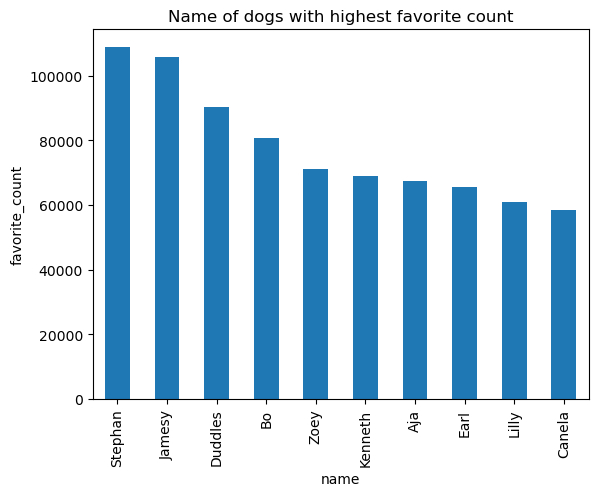

In [235]:
twitter_archive_master.groupby('name')['favorite_count'].max().nlargest(10).plot(kind='bar')
plt.ylabel('favorite_count')
plt.title('Name of dogs with highest favorite count')

### Insight
The dog  with the highest favorite_count is Stephan with over 100000 favorite_count

Text(0.5, 1.0, 'Name of dogs with highest retweet_count')

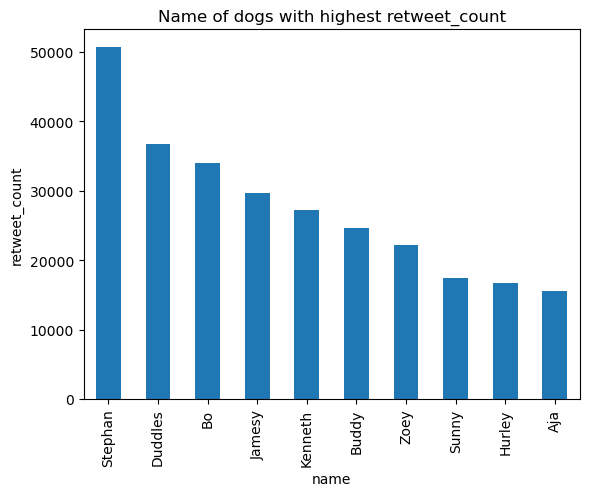

In [236]:
twitter_archive_master.groupby('name')['retweet_count'].max().nlargest(10).plot(kind='bar')
plt.ylabel('retweet_count')
plt.title('Name of dogs with highest retweet_count')

### Insight

Similarly the bar chart shows the  dogs with high re tweet count and interestingly most dogs that are in the list of top favourite counts are also present in the top re tweet count list.

Text(0.5, 1.0, 'Relationship between retweet count and favorite count')

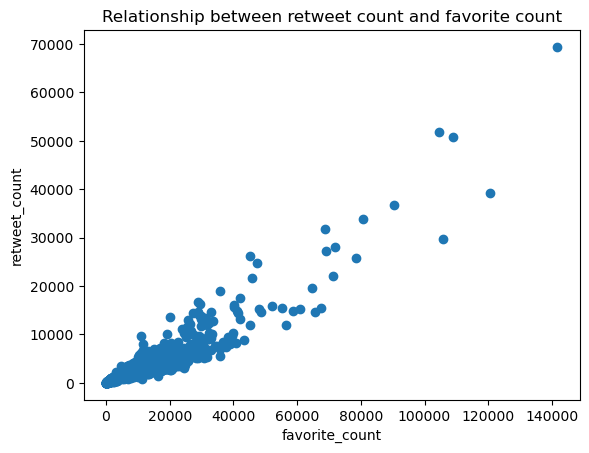

In [237]:
#Investigating relationship between retweet_count and favourite count
plt.scatter(twitter_archive_master['favorite_count'],twitter_archive_master['retweet_count'])
plt.ylabel('retweet_count')
plt.xlabel('favorite_count')
plt.title("Relationship between retweet count and favorite count")

### Insight
As retweet count for a dog increases, the favorite count increases this suggest a high correlation between retweet count and favourite count

In [238]:
#Creating new column
twitter_archive_master['Year']= twitter_archive_master['timestamp'].dt.strftime('%Y')

In [239]:
#Most active year
twitter_archive_master.groupby('Year')['retweet_count','favorite_count'].sum()

C:\Users\user\AppData\Local\Temp\ipykernel_14648\2238807654.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  twitter_archive_master.groupby('Year')['retweet_count','favorite_count'].sum()


,retweet_count,favorite_count
Year,,
2015,561212,1387826
2016,2123743,6354261
2017,1683426,7152777


C:\Users\user\AppData\Local\Temp\ipykernel_14648\3710732618.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  twitter_archive_master.groupby('Year')['retweet_count','favorite_count'].sum().plot(kind='line')


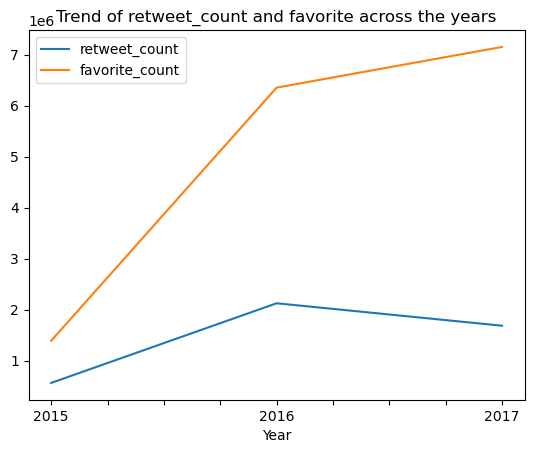

In [240]:
twitter_archive_master.groupby('Year')['retweet_count','favorite_count'].sum().plot(kind='line')
plt.title("Trend of retweet_count and favorite across the years")
plt.show()

### Insight
The highest retweet counts was recorded in 2016 before dipping in the year 2017 while the number of favourite counts has been steadly increasing from a sharp rise from 2015 to 2016 and a further rise albeit slower rate from 2016 to 2017.